In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Постановка задачи.
- Реализация методов нахождения производной при фиксированном значении шага.
- Реализация методов нахождения приближенного значения определенного интеграла.
- Демонстрация работы всех методов на двух примерах - функциях. Для методов нахождения производной необходимо изобразить график полученной функции, а для методов нахождения интеграла - вывести значение.
- Анализ зависимости среднеквадратических отклонений значений, получаемых с помощью всех методов, от точных, полученных аналитически, от величины шага.

### Численное вычисление производной.

Чтобы вычислить производную функции, заданной на интервале $[a, b]$, необходимо выбрать шаг разбиения $h$ и разделить интервал  $[a, b]$ на отрезки длиной $h$.
Количество таких отрезков будет $n = \frac{b - a}{h}$.

В точках - концах отрезков будут вычисляться производные. Данные точки определяются формулой $x_i = a + hi$, где $i = 0,..,n$.

Формулы расчета производных в точках определяются методом:
1. **Метод правой разностной производной.**
Производная в точке $x$ вычисляется приближенно по формуле:
$f'(x) = \frac{f(x + h) - f(x)}{h}$

2. **Метод левой разностной производной.**
Производная в точке $x$ вычисляется приближенно по формуле:
$f'(x) = \frac{f(x) - f(x - h)}{h}$

3. **Метод центральной разностной производной.**
Производная в точке $x$ вычисляется приближенно по формуле:
$f'(x) = \frac{f(x + h) - f(x - h)}{2h}$


In [2]:
# метод правой разностной производной - производная в точке
def right_derivative_at_point(f, x, h):
  return (f(x + h) - f (x))/h

# метод правой разностной производной - возвращает массив значений производной в каждой точке разбиения
def right_derivative(f, x, h, n):
  result = []
  for i in range(n + 1):
      result.append(right_derivative_at_point(f, x[i], h))
  return np.array(result)

# метод левой разностной производной - производная в точке
def left_derivative_at_point(f, x, h):
  return (f(x) - f(x - h))/h

# метод левой разностной производной - возвращает массив значений производной в каждой точке разбиения
def left_derivative(f, x, h, n):
  result = []
  for i in range(n + 1):
    result.append(left_derivative_at_point(f, x[i], h))
  return np.array(result)


# метод центральной разностной производной - производная в точке
def central_derivative_at_point(f, x, h):
  return (f(x + h) - f(x - h))/(2*h)


# метод центральной разностной производной - возвращает массив значений производной в каждой точке разбиения
def central_derivative(f, x, h, n):
  result = []
  for i in range(n + 1):
      result.append(central_derivative_at_point(f, x[i], h))
  return np.array(result)

**Пример 1.**

Найдем производную функции $f(x) = x^3$ на отрезке $[0, 10]$ с шагом разбиения $h = 1$

Аналитически получим $f'(x) = 3x^2$.

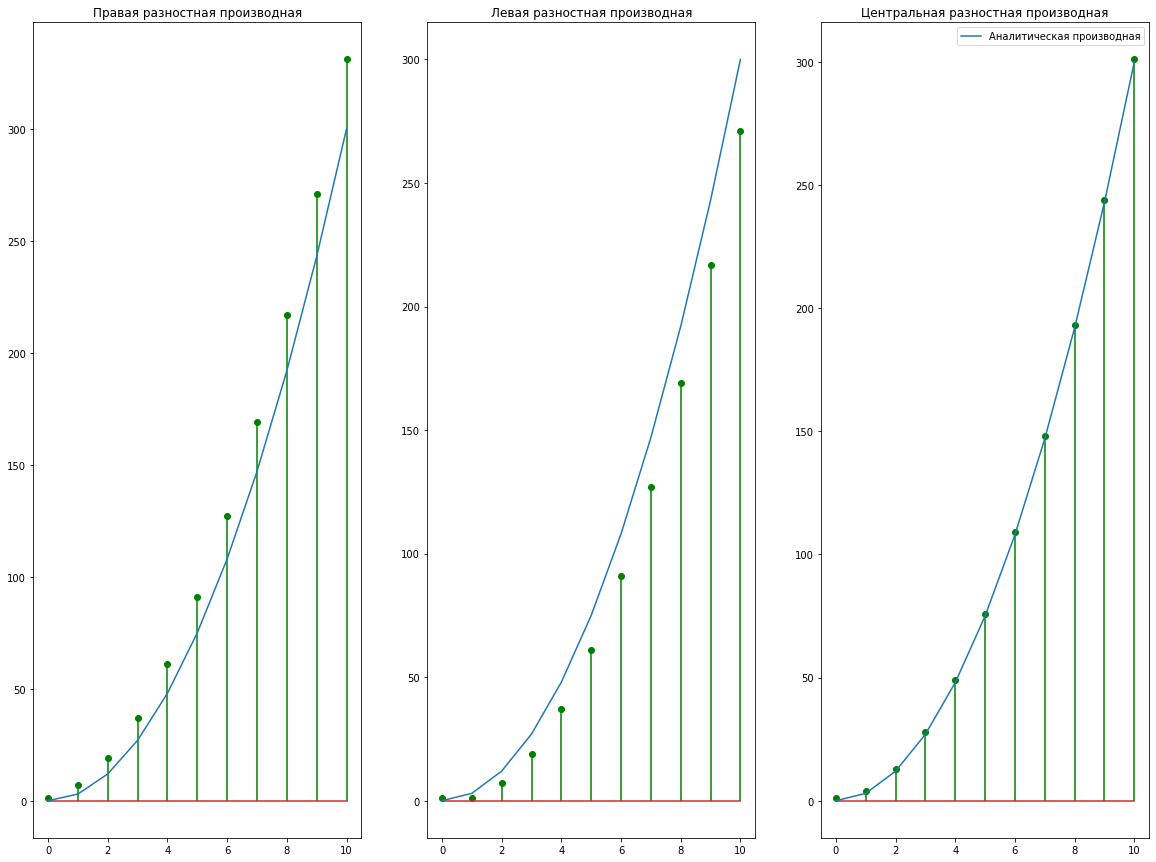

In [3]:
f = lambda x : x**3
# аналитическая (истинная) производная
f_derivative = lambda x : 3*x**2
# интервал, на котором мы определяем функцию
a, b = 0, 10
# шаг разбиения
h = 1
n = int((b - a)/h)
x = []
for i in range(n + 1):
  x.append(a + h*i)

fig, (ax) =  plt.subplots(nrows = 1, ncols = 3) #, sharex = True, sharey = True)
fig.set_figwidth(20)
fig.set_figheight(15)
ax[0].stem(np.array(x), right_derivative(f, x, h, n), 'g')
ax[0].plot(np.array(x), f_derivative(np.array(x)), label = "Аналитическая производная")
ax[1].stem(np.array(x), left_derivative(f, x, h, n), 'g')
ax[1].plot(np.array(x), f_derivative(np.array(x)), label = "Аналитическая производная")
ax[2].stem(np.array(x), central_derivative(f, x, h, n), 'g')
ax[2].plot(np.array(x), f_derivative(np.array(x)), label = "Аналитическая производная")
ax[0].set_title("Правая разностная производная")
ax[1].set_title("Левая разностная производная")
ax[2].set_title("Центральная разностная производная")
plt.legend()
plt.savefig("f_derivative")

**Вывод:**
*было установлено, что наиболее близкое к точному значение производной в данном случае можно получить с помощью метода центральной разностной производной*

**Пример 2.**

Найдем производную функции $f(x) = \sin(x)$ на отрезке $[0.1, 15]$ с шагом разбиения $h = 1$

Аналитически получим $f'(x) = \cos(x)$.

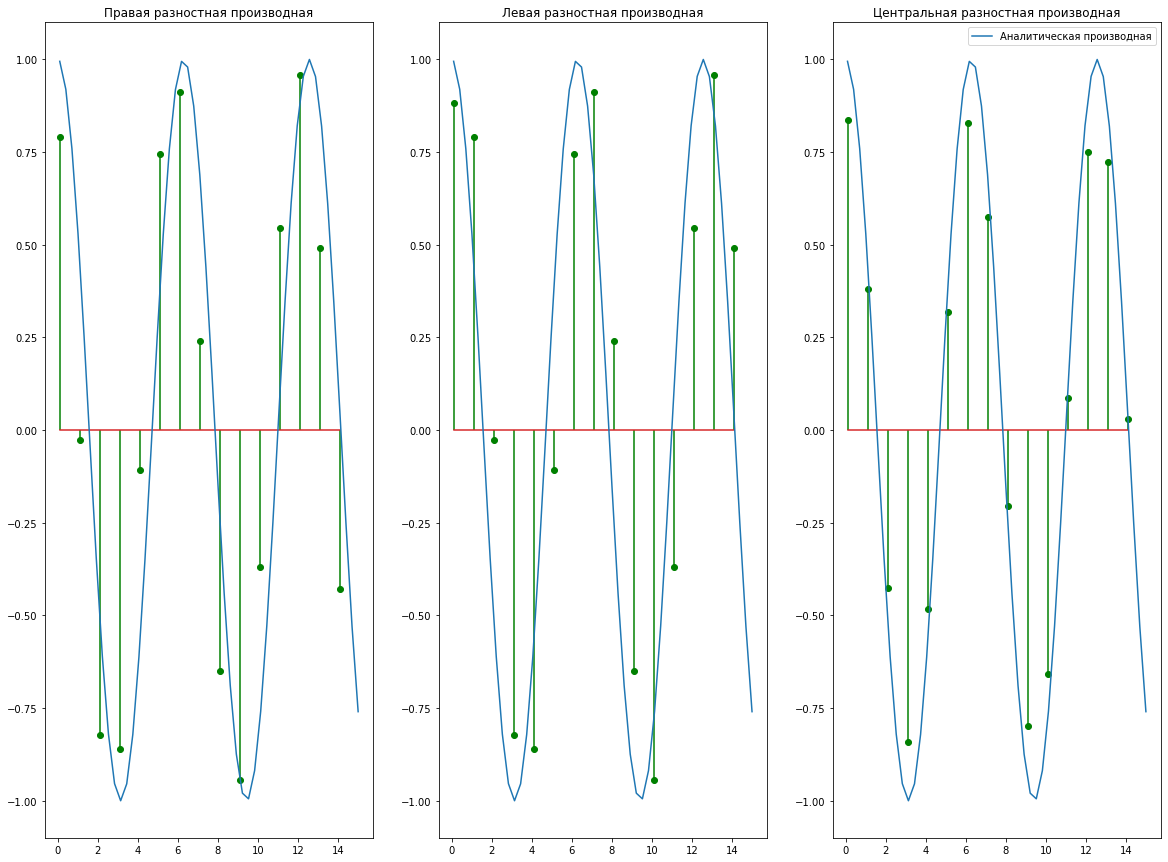

In [4]:
f = lambda x : np.sin(x)
# аналитическая (истинная) производная
f_derivative = lambda x : np.cos(x)
# интервал, на котором мы определяем функцию
a, b = 0.1, 15
# шаг разбиения
h = 1
n = int((b - a)/h)
x = []
for i in range(n + 1):
  x.append(a + h*i)

fig, (ax) =  plt.subplots(nrows = 1, ncols = 3) #, sharex = True, sharey = True)
fig.set_figwidth(20)
fig.set_figheight(15)
ax[0].stem(np.array(x), right_derivative(f, x, h, n), 'g')
ax[0].plot(np.linspace(0.1, 15), f_derivative(np.linspace(0.1, 15)), label = "Аналитическая производная")
ax[1].stem(np.array(x), left_derivative(f, x, h, n), 'g')
ax[1].plot(np.linspace(0.1, 15), f_derivative(np.linspace(0.1, 15)), label = "Аналитическая производная")
ax[2].stem(np.array(x), central_derivative(f, x, h, n), 'g')
ax[2].plot(np.linspace(0.1, 15), f_derivative(np.linspace(0.1, 15)), label = "Аналитическая производная")
ax[0].set_title("Правая разностная производная")
ax[1].set_title("Левая разностная производная")
ax[2].set_title("Центральная разностная производная")
plt.legend()
plt.savefig("f_derivative_2")

**Вывод:** *было установлено, что в данном примере наиболее приближенные к точным значения можно получить методом центральной разностной производной*

#### **Среднеквадратичное отклонение** 
Среднеквадратичные отклонения будем искать по формуле:

$σ = \sqrt\frac{\sum(f_i - g_i)^2}{n}$, где $f_i$ - численное значение производной, а $g_i$ - истинное значение (значение аналитически полученной производной) в точке $x_i$/

In [5]:
# среднеквадратичное отклонение численных значений от истинных
def standard_deviation(numerical, true):
  summ = 0
  for i in range(len(true)):
    summ += (numerical[i] - true[i])**2
  return np.sqrt(summ/len(true))

Найдем среднеквадратичное отклонение для примеров выше:

1. функция $f(x) = x^3$ на отрезке $[0, 10]$

Среднеквадратическое отклонение


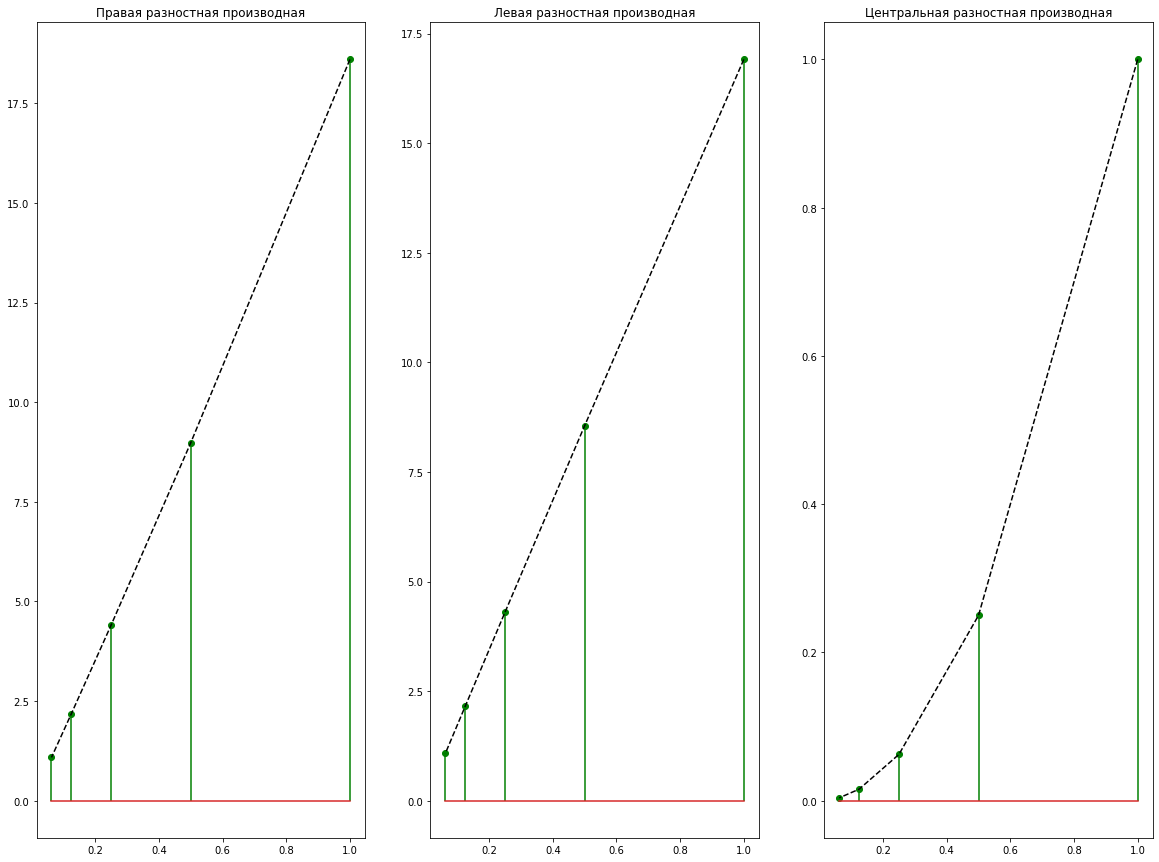

In [6]:
f = lambda x : x**3
f_derivative = lambda x : 3*x**2
h = [1, 1/2, 1/4, 1/8, 1/16]
a, b, = 0, 10
def array_x(a, b, h):
  n = int((b - a)/h)
  x = []
  for i in range(n + 1):
    x.append(a + h*i)
  return x, n

right_derivative_error = []
left_derivative_error = []
central_derivative_error = []
print("Среднеквадратическое отклонение")
for i in range(len(h)):
  x, n = array_x(a, b, h[i])
  array_f_derivative = list(map(lambda x: f_derivative(x), x ))
  right_derivative_error.append(standard_deviation(right_derivative(f, x, h[i], n), array_f_derivative))
  left_derivative_error.append(standard_deviation(left_derivative(f, x, h[i], n), array_f_derivative))
  central_derivative_error.append(standard_deviation(central_derivative(f, x, h[i], n), array_f_derivative))
  
fig, (ax) =  plt.subplots(nrows = 1, ncols = 3)
fig.set_figwidth(20)
fig.set_figheight(15)
ax[0].stem(h, right_derivative_error, 'g')
ax[0].plot(h, right_derivative_error, "k--")
ax[1].stem(h, left_derivative_error, 'g')
ax[1].plot(h, left_derivative_error, "k--")
ax[2].stem(h, central_derivative_error, 'g')
ax[2].plot(h, central_derivative_error, "k--")
ax[0].set_title("Правая разностная производная")
ax[1].set_title("Левая разностная производная")
ax[2].set_title("Центральная разностная производная")
plt.savefig("f_error_1")

**Вывод:**

2. функция $f(x) = \sin(x)$ на отрезке $[0.1, 15]$

Среднеквадратическое отклонение


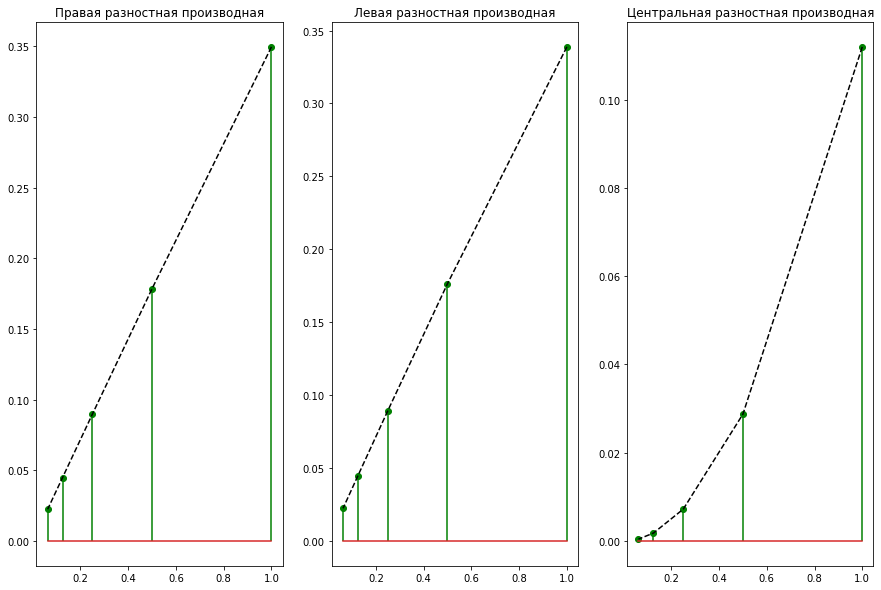

In [7]:
f = lambda x : np.sin(x)
f_derivative = lambda x : np.cos(x)
h = [1, 1/2, 1/4, 1/8, 1/16]
a, b, = 0.1, 15
def array_x(a, b, h):
  n = int((b - a)/h)
  x = []
  for i in range(n + 1):
    x.append(a + h*i)
  return x, n

right_derivative_error = []
left_derivative_error = []
central_derivative_error = []
print("Среднеквадратическое отклонение")
for i in range(len(h)):
  x, n = array_x(a, b, h[i])
  array_f_derivative = list(map(lambda x: f_derivative(x), x ))
  right_derivative_error.append(standard_deviation(right_derivative(f, x, h[i], n), array_f_derivative))
  left_derivative_error.append(standard_deviation(left_derivative(f, x, h[i], n), array_f_derivative))
  central_derivative_error.append(standard_deviation(central_derivative(f, x, h[i], n), array_f_derivative))
  
fig, (ax) =  plt.subplots(nrows = 1, ncols = 3)
fig.set_figwidth(15)
fig.set_figheight(10)
ax[0].stem(h, right_derivative_error, 'g')
ax[0].plot(h, right_derivative_error, "k--")
ax[1].stem(h, left_derivative_error, 'g')
ax[1].plot(h, left_derivative_error, "k--")
ax[2].stem(h, central_derivative_error, 'g')
ax[2].plot(h, central_derivative_error, "k--")
ax[0].set_title("Правая разностная производная")
ax[1].set_title("Левая разностная производная")
ax[2].set_title("Центральная разностная производная")
plt.savefig("f_error_2")

**Вывод:**

### Численное вычисление интеграла

Определенный интеграл функции $f$ численно вычисляется как площадь под графиком $f$. Для расчета площади, отрезок, на котором необходимо вычислить интеграл,  разбивается на элементарные отрезки.

Мы получаем сетку узлов на $[a, b]$:  $a = x_0 < x_1 < ... < x_n = b$

Cуммируя значения площадей под графиком на элементарных отрезках - площади элементарных криволинейных трапеций, мы получим общую площадь под графиком. Таким образом, интеграл будет вычисляться, как сумма элементарных интегралов:

$I = \sum I_i$, где каждый $I_i$ вычисляется на отрезке $[x_{i-1}, x_i]$

**Методы численного интегрирования** отличаются способом вычисления площадей этих элементарных криволинейных трапеций:

1. **Формула прямоугольников.** В данном методе площадь каждой криволинейной трапеции считается приближенно равной площади прямоугольника. В зависимости от точки, определяющей высоту прямоугольника, различают:

  1.1 Метод левых прямоугольников: $I_i = hf_{i - 1}$

  1.2 Метод правых прямоугольников: $I_i = hf_{i}$

  1.3 Метод средних прямоугольников: $I_i = hf_{i - \frac{1}{2}}$

2. **Формула трапеций.** В данном методе площадь криволинейной трапеции выражается как площадь трапеции, образованной значениями функции на обоих концах элементарного отрезка. $I_i = \frac{h}{2}(f_{i - 1} + f_i)$

3. **Формула Симпсона.** В данном методе приближением площади криволинейной трапеции служит площадь под параболой, проходящей через три точки - концы элементарного отрезка и его середину. $I_i = \frac{h}{6}(f_{i - 1} +  4f_{i - \frac{1}{2}} + f_i)$



In [8]:
# метод прямоугольников - площадь элементарной криволинейной трапеции
def elementary_rectangle(f, x, h):
  return f(x) * h

# метод левой прямоугольников - возвращает сумму площадей элементарных криволинейных трапеций
def left_rectangles(f, a, h, n):
  result = 0
  for i in range(1, n + 1):
      result += elementary_rectangle(f, a + h * (i - 1), h)
  return result

def right_rectangles(f, a, h, n):
  result = 0
  for i in range(1, n + 1):
    result += elementary_rectangle(f, a + h * i, h)
  return result

def medium_rectangles(f, a, h, n):
  result = 0
  for i in range(1, n + 1):
    result += elementary_rectangle(f, a + h * (i - 1/2), h)
  return result

In [9]:
# метод трапеций - возвращает сумму площадей элементарных криволинейных трапеций
def trapeze(f, a, h, n):
  result = 0
  for i in range(1, n + 1):
    result += h/2 * (f(a + h * i) + f(a + h * (i - 1)))
  return result

In [10]:
# метод Симпсона - возвращает сумму площадей элементарных криволинейных трапеций
def simpson(f, a, h, n):
  result = 0
  for i in range(1, n + 1):
    result += h/6 * (f(a + h * (i - 1)) + f(a + h * (i + 1)) + 4 * f(a + h * (i - 1/2)))
  return result

**Пример 1.**

Найдем интеграл функции $f(x) = x^3$ на отрезке $[0, 10]$ с шагом разбиения $h = 1$

Аналитически получим $\int_0^{10} f(x) = \frac{x^4}{4}\mid_0^{10} = 2500$.

In [11]:
f = lambda x : x**3
# аналитическое (истинная) значение интеграла
integral = 2500
# интервал, на котором мы определяем функцию
a, b = 0, 10
# шаг разбиения
h = 1
n = int((b - a)/h)

print("По формуле левых прямоугольников: ", left_rectangles(f, a, h, n))
print("По формуле правых прямоугольников: ", right_rectangles(f, a, h, n))
print("По формуле средних прямоугольников: ", medium_rectangles(f, a, h, n))

По формуле левых прямоугольников:  2025
По формуле правых прямоугольников:  3025
По формуле средних прямоугольников:  2487.5


In [12]:
print("По формуле трапеций: ", trapeze(f, a, h, n))

По формуле трапеций:  2525.0


In [13]:
print("По формуле Симпсона: ", simpson(f, a, h, n))

По формуле Симпсона:  2721.6666666666665


**Вывод:**

#### **Среднеквадратичное отклонение:**

Среднеквадратическое отклонение


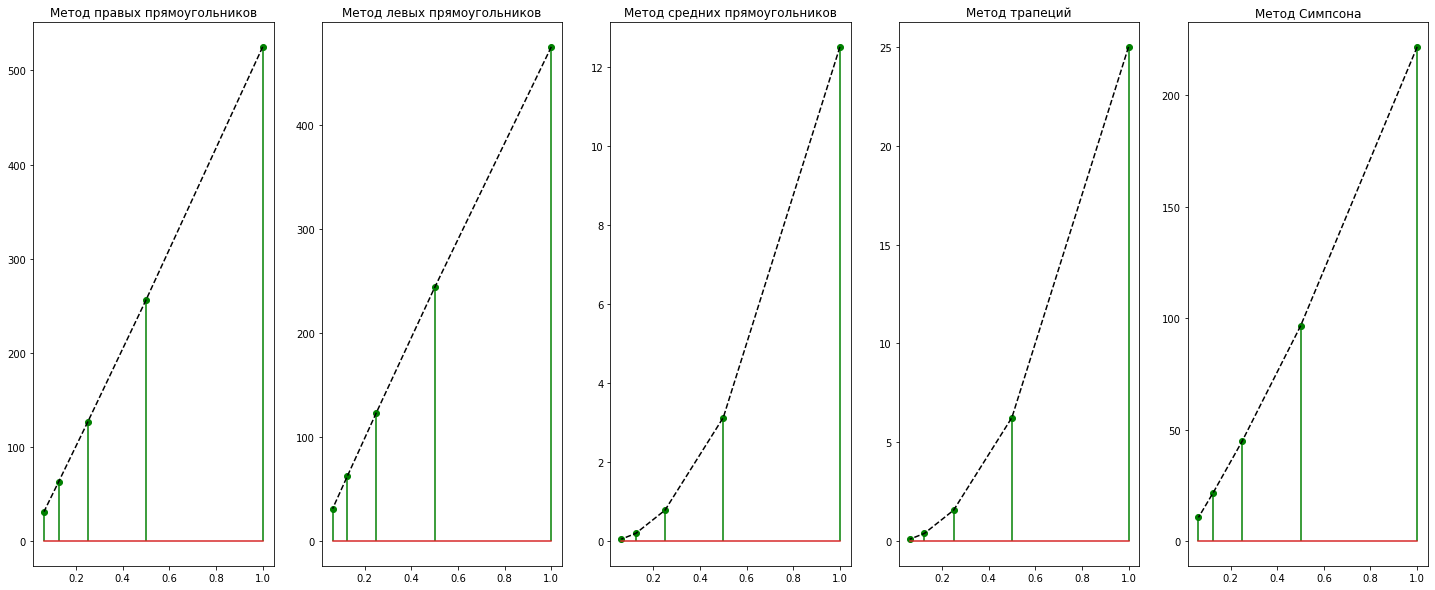

In [14]:
f = lambda x : x**3
integral = 2500
h = [1, 1/2, 1/4, 1/8, 1/16]
a, b, = 0, 10

right_rectangle_error = []
left_rectangle_error = []
medium_rectangle_error = []
trapeze_error = []
simpson_error = []
print("Среднеквадратическое отклонение")
for i in range(len(h)):
  n = int((b - a)/h[i])
  right_rectangle_error.append(standard_deviation([right_rectangles(f, a, h[i], n)], [integral]))
  left_rectangle_error.append(standard_deviation([left_rectangles(f, a, h[i], n)], [integral]))
  medium_rectangle_error.append(standard_deviation([medium_rectangles(f, a, h[i], n)], [integral]))
  trapeze_error.append(standard_deviation([trapeze(f, a, h[i], n)], [integral]))
  simpson_error.append(standard_deviation([simpson(f, a, h[i], n)], [integral]))
  
fig, (ax) =  plt.subplots(nrows = 1, ncols = 5)
fig.set_figwidth(25)
fig.set_figheight(10)
ax[0].stem(h, right_rectangle_error, 'g')
ax[0].plot(h, right_rectangle_error, "k--")
ax[1].stem(h, left_rectangle_error, 'g')
ax[1].plot(h, left_rectangle_error, "k--")
ax[2].stem(h, medium_rectangle_error, 'g')
ax[2].plot(h, medium_rectangle_error, "k--")
ax[3].stem(h, trapeze_error, 'g')
ax[3].plot(h, trapeze_error, "k--")
ax[4].stem(h, simpson_error, 'g')
ax[4].plot(h, simpson_error, "k--")
ax[0].set_title("Метод правых прямоугольников")
ax[1].set_title("Метод левых прямоугольников")
ax[2].set_title("Метод средних прямоугольников")
ax[3].set_title("Метод трапеций")
ax[4].set_title("Метод Симпсона")

plt.savefig("f_error_integra")

**Вывод:**

**Пример 2.**

Найдем интеграл функции $f(x) = \sin(x)$ на отрезке $[0.1, 23]$ с шагом разбиения $h = 1$

Аналитически получим $\int_{0.1}^{23} f(x) = -\cos(x)\mid_{0.1}^{23} = 1.52784$

In [15]:
f = lambda x : np.sin(x)
# аналитическое (истинная) значение интеграла
integral = 1.52784
# интервал, на котором мы определяем функцию
a, b = 0.1, 23
# шаг разбиения
h = 1
n = int((b - a)/h)

print("По формуле левых прямоугольников: ", left_rectangles(f, a, h, n))
print("По формуле правых прямоугольников: ", right_rectangles(f, a, h, n))
print("По формуле средних прямоугольников: ", medium_rectangles(f, a, h, n))

По формуле левых прямоугольников:  1.9247334782061054
По формуле правых прямоугольников:  1.7162634661351976
По формуле средних прямоугольников:  2.0744469537420778


In [16]:
print("По формуле трапеций: ", trapeze(f, a, h, n))

По формуле трапеций:  1.8204984721706512


In [17]:
print("По формуле Симпсона: ", simpson(f, a, h, n))

По формуле Симпсона:  1.6920650052380828


**Среднеквадратическое отклонение**

Среднеквадратическое отклонение


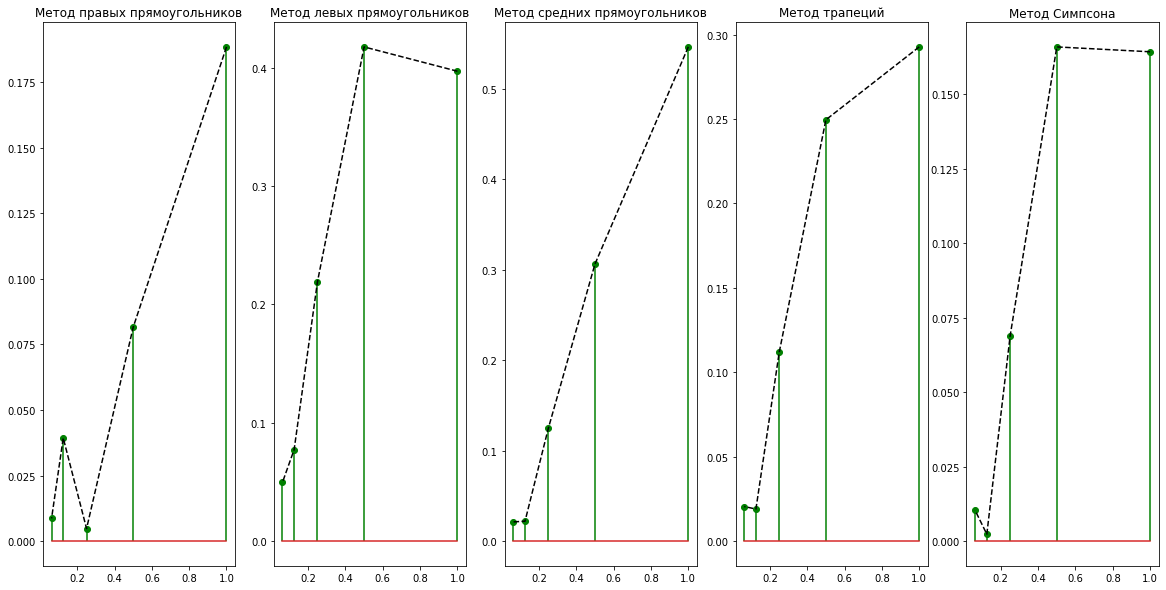

In [18]:
f = lambda x : np.sin(x)
integral =  1.52784
h = [1, 1/2, 1/4, 1/8, 1/16]
a, b, = 0.1, 23

right_rectangle_error = []
left_rectangle_error = []
medium_rectangle_error = []
trapeze_error = []
simpson_error = []
print("Среднеквадратическое отклонение")
for i in range(len(h)):
  n = int((b - a)/h[i])
  right_rectangle_error.append(standard_deviation([right_rectangles(f, a, h[i], n)], [integral]))
  left_rectangle_error.append(standard_deviation([left_rectangles(f, a, h[i], n)], [integral]))
  medium_rectangle_error.append(standard_deviation([medium_rectangles(f, a, h[i], n)], [integral]))
  trapeze_error.append(standard_deviation([trapeze(f, a, h[i], n)], [integral]))
  simpson_error.append(standard_deviation([simpson(f, a, h[i], n)], [integral]))
  
fig, (ax) =  plt.subplots(nrows = 1, ncols = 5)
fig.set_figwidth(20)
fig.set_figheight(10)
ax[0].stem(h, right_rectangle_error, 'g')
ax[0].plot(h, right_rectangle_error, "k--")
ax[1].stem(h, left_rectangle_error, 'g')
ax[1].plot(h, left_rectangle_error, "k--")
ax[2].stem(h, medium_rectangle_error, 'g')
ax[2].plot(h, medium_rectangle_error, "k--")
ax[3].stem(h, trapeze_error, 'g')
ax[3].plot(h, trapeze_error, "k--")
ax[4].stem(h, simpson_error, 'g')
ax[4].plot(h, simpson_error, "k--")
ax[0].set_title("Метод правых прямоугольников")
ax[1].set_title("Метод левых прямоугольников")
ax[2].set_title("Метод средних прямоугольников")
ax[3].set_title("Метод трапеций")
ax[4].set_title("Метод Симпсона")
plt.savefig("f_error_integra_2")